# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/metadados_demo01_corrigido.csv')
df.columns = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','mau','sexo','posse_de_veiculo','posse_de_imovel','tipo_renda_Pensioner','tipo_renda_State servant','tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education','educacao_Incomplete higher', 'educacao_Lower secondary','educacao_Secondary / secondary special', 'estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow','tipo_residencia_House / apartment','tipo_residencia_Municipal apartment','tipo_residencia_Office apartment','tipo_residencia_Rented apartment','tipo_residencia_With parents','possui_fone_comercial','possui_fone','possui_email']
print(df.shape)
df.head()

(16650, 28)


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda_Pensioner,tipo_renda_State servant,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,possui_fone_comercial,possui_fone,possui_email
0,0,58.832877,3.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
2,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,46.224658,2.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,0,29.230137,3.021918,2.0,False,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
#Nao possui strings apenas ints, floats e booleanos que serao modificados posteriormente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   qt_pessoas_residencia                   16650 non-null  float64
 4   mau                                     16650 non-null  bool   
 5   sexo                                    16650 non-null  int64  
 6   posse_de_veiculo                        16650 non-null  int64  
 7   posse_de_imovel                         16650 non-null  int64  
 8   tipo_renda_Pensioner                    16650 non-null  int64  
 9   tipo_renda_State servant                16650 non-null  int64  
 10  tipo_renda_Student                      16650 non-null  in

In [4]:
df.mau = df.mau.map({True: 1, False:0})
df.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [5]:
#separando a variavel 'mau' do conjunto X com todas as outras.
X = df.drop('mau', axis=1)
y = df.mau
X.shape, y.shape

((16650, 27), (16650,))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Quantidade de linhas e colunas de X_train (70%):', x_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', x_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):', len(y_train))
print('Quantidade de linhas de y_test (30%):', len(y_test))

Quantidade de linhas e colunas de X_train (70%): (11655, 27)
Quantidade de linhas e colunas de X_test (30%): (4995, 27) 

Quantidade de linhas de y_train (70%): 11655
Quantidade de linhas de y_test (30%): 4995


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
#1
clf = DecisionTreeClassifier(random_state=100)

#2
clf = clf.fit(x_train,y_train)

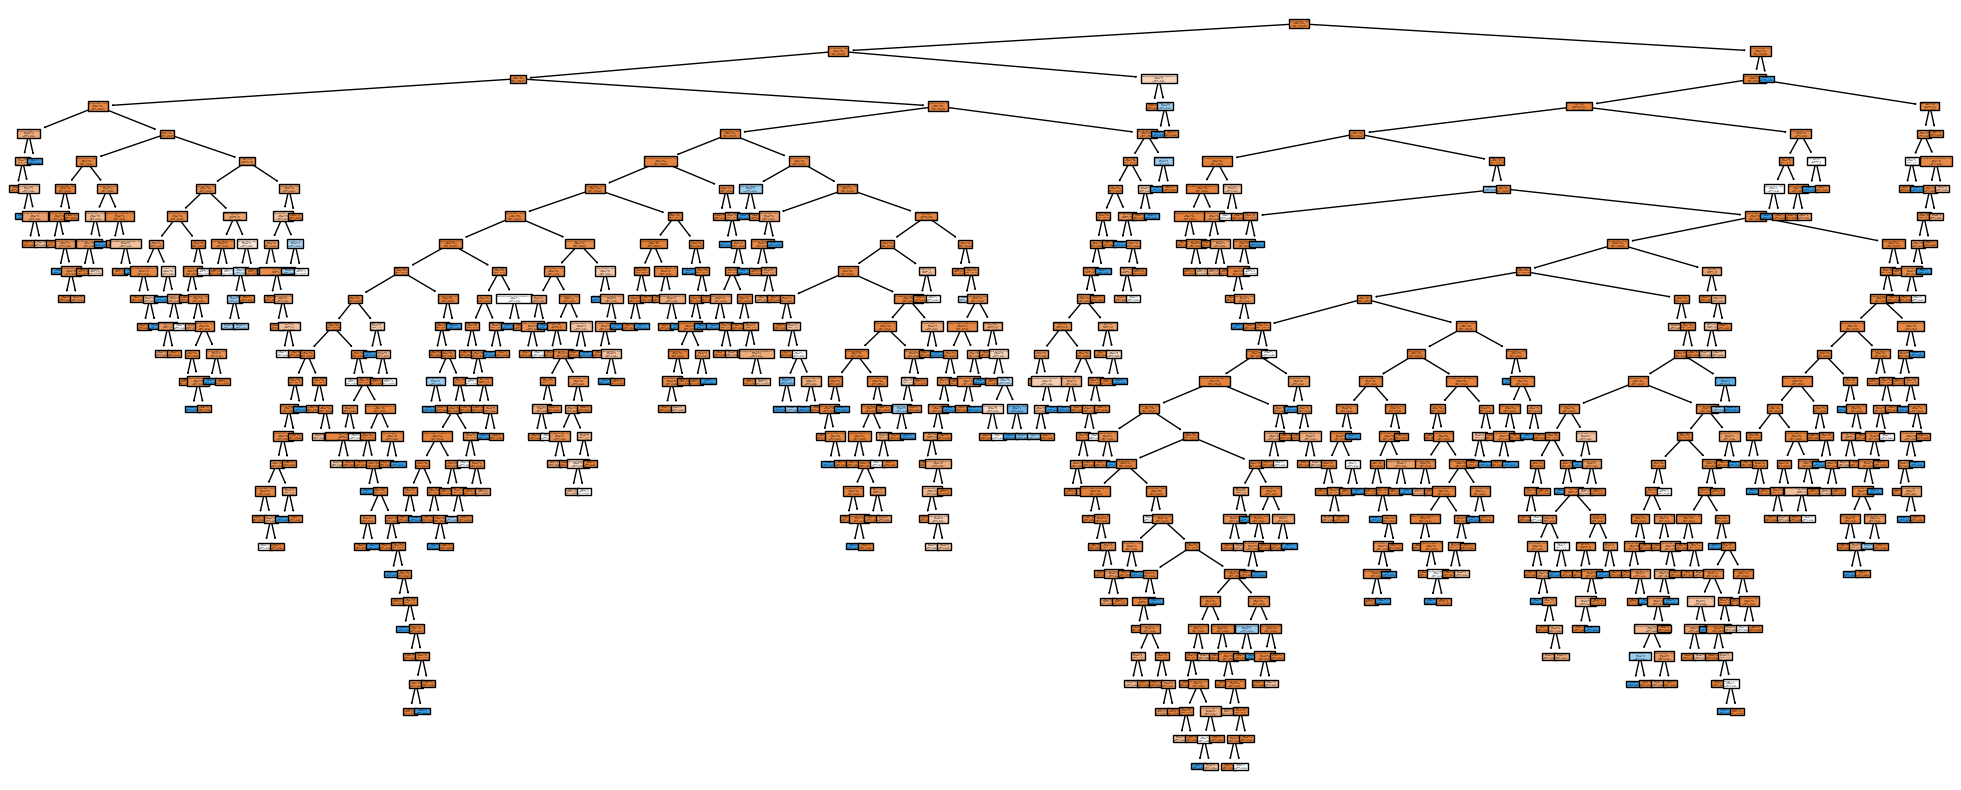

In [8]:
#3
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

In [9]:
#4
y_pred = clf.predict(x_train)

In [10]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[11382,    13],
       [   88,   172]])

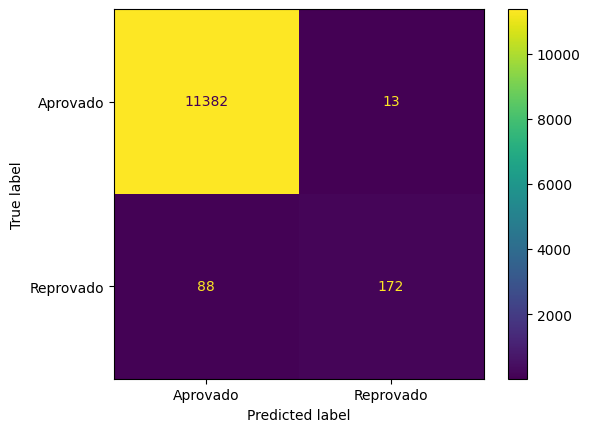

In [11]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Aprovado', 'Reprovado'])
cm_display.plot()
plt.show()

In [12]:
#5
pred = clf.predict(x_train)
accuracy_score(y_train, pred)

0.9913341913341913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [19]:
#1
y_pred2 = clf.predict(x_test)

In [20]:
#2
cm_test = confusion_matrix(y_test, y_pred2, labels=clf.classes_)
cm_test

array([[4851,   14],
       [ 125,    5]])

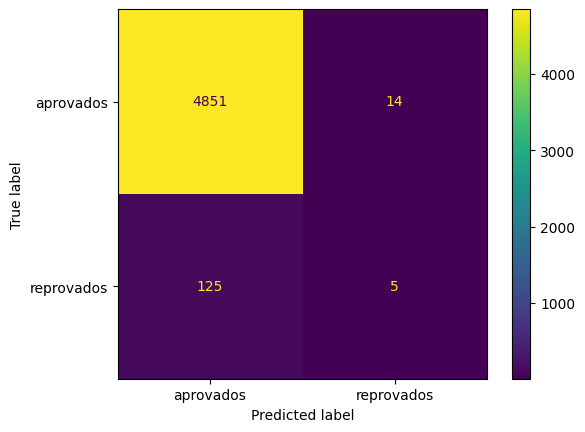

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, display_labels=['aprovados', 'reprovados'])

In [16]:
#3
print('Acurácia da base de teste:', accuracy_score(y_test, y_pred2),)

print('Acurácia da base de treinamento:',accuracy_score(y_train, pred))

Acurácia da base de teste: 0.9693693693693693
Acurácia da base de treinamento: 0.9913341913341913


In [24]:
clf_podada = DecisionTreeClassifier(max_depth=10 ,min_samples_leaf=5, random_state=123)
clf_podada = clf.fit(x_train,y_train)
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.9721721721721722

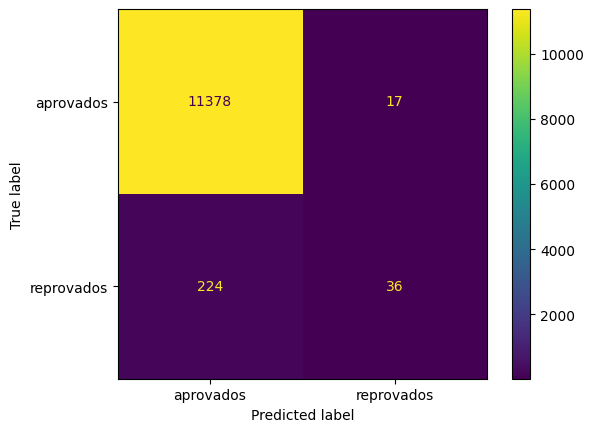

In [25]:
ConfusionMatrixDisplay.from_estimator(clf_podada, x_train, y_train, display_labels=['aprovados', 'reprovados'])

In [27]:
# Proporção de proponentes classificados como maus:

TP = 11378 # classificados corretamente como bons
TN = 36 # classificados corretamente como maus
FP = 224 # classificados incorretamente como bons
FN = 17 # classificados incorretamente como maus

predicted_maus = TN + FN  # classificados como maus

print(f'Classificados como mau: {round(((predicted_maus)/(FP+FN+TP+TN)), 4) * 100}%')

Classificados como mau: 0.44999999999999996%


In [28]:
#5
df.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [29]:
print(f'proporção de bons:{16260 / (16260 + 390)}')
print(f'proporção de maus:{390 / (16260 + 390)}')

proporção de bons:0.9765765765765766
proporção de maus:0.023423423423423424


In [30]:
# Se toda a classificação fosse de 'bons', seria 1 em todos os valores
predicao_bons = np.ones(len(predict))
predicao_bons

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
accuracy_score(y_test, predicao_bons)

0.026026026026026026